In [1]:
import cv2
import imutils
import time
import numpy as np
import matplotlib.pyplot as plt

# Initializing the HOG person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())


In [2]:
cd Desktop

C:\Users\aghon\Desktop


In [3]:
def pedestrian_detector(image):

    # Resizing the Image
    image = imutils.resize(image,width=min(400, image.shape[1]))

    # Detecting all the regions in the image that has a pedestrians inside it
    (regions, _) = hog.detectMultiScale(image,winStride=(4, 4),padding=(4, 4),scale=1.05)

    # Drawing the regions in the Image
    for (x, y, w, h) in regions:
        cv2.rectangle(image, (x, y),(x + w, y + h),(0, 0, 255), 2)

    if len(regions) > 0 :
        return True, image
    else:
        return False, image

In [4]:
image = cv2.imread('60c3b752d9773.image.jpg')
bool, image = pedestrian_detector(image)


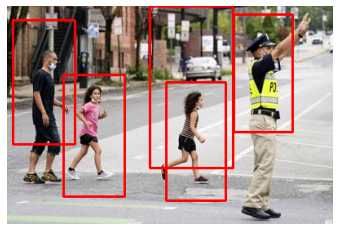

In [5]:
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


## streaming with visualize

In [6]:
def pedestrian_detector(image):

    # Resizing the Image
    image = imutils.resize(image,width=min(400, image.shape[1]))

    # Detecting all the regions in the image that has a pedestrians inside it
    (regions, _) = hog.detectMultiScale(image,winStride=(4, 4),padding=(4, 4),scale=1.05)

    # Drawing the regions in the Image
    for (x, y, w, h) in regions:
        cv2.rectangle(image, (x, y),(x + w, y + h),(0, 0, 255), 2)

    if len(regions) > 0 :
        return True, regions, image
    else:
        return False, regions, image
    
def peocess_with_visualize():
    output = []   # save last 20 processes
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Cannot open camera")
        exit()

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        print(type(frame))
        # if frame is read correctly ret is True
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break
        # Our operations on the frame come here

        # check if there are pedestrians in the image
        pedestrian, regions, frame  = pedestrian_detector(frame)
        output.append(pedestrian)

        if len(output) > 20:
            output.pop(0)

        count_of_true_cases = np.count_nonzero(output)

        if count_of_true_cases > 10:
            return True

        print(pedestrian)


        # Display the resulting frame
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) == ord('q'):
            break
        time.sleep(.3)
    # When everything done, release the capture
    cap.release()
    cv2.destroyAllWindows()


In [7]:
output = False
output = peocess_with_visualize()

<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
True
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'numpy.ndarray'>
False
<class 'num

## streaming without visualize

In [ ]:
def pedestrian_detector(image):

    # Resizing the Image
    image = imutils.resize(image,width=min(400, image.shape[1]))

    # Detecting all the regions in the image that has a pedestrians inside it
    (regions, _) = hog.detectMultiScale(image,winStride=(4, 4),padding=(4, 4),scale=1.05)

    # Drawing the regions in the Image
    for (x, y, w, h) in regions:
        cv2.rectangle(image, (x, y),(x + w, y + h),(0, 0, 255), 2)

    if len(regions) > 0 :
        return True, regions
    else:
        return False, regions
    
def peocess():
    output = []   # save last 20 processes
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Cannot open camera")
        exit()

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        print(type(frame))
        # if frame is read correctly ret is True
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break
        # Our operations on the frame come here

        # check if there are pedestrians in the image
        pedestrian, regions  = pedestrian_detector(frame)
        output.append(pedestrian)

        if len(output) > 20:
            output.pop(0)

        count_of_true_cases = np.count_nonzero(output)

        if count_of_true_cases > 10:
            return True

        print(pedestrian)


        # Display the resulting frame
#         cv2.imshow('frame', frame)
#         if cv2.waitKey(1) == ord('q'):
#             break
        time.sleep(.3)
    # When everything done, release the capture
    cap.release()
    cv2.destroyAllWindows()


In [ ]:
output = False

output = peocess()